In [1]:
from io import StringIO

import requests
import pandas as pd
import matplotlib.pyplot as plt

from config import TAIWAN_URL


datastring = "20191018"
url = TAIWAN_URL % datastring

rawdata = requests.post(url).text
header, footer = [], []
for i, line in enumerate(rawdata.split("\n")):
    if "Security Code" in line:
        header.append(i)
    if "Remarks:" in line:
        footer.append(i)
header, footer = header[0], footer[-1]
rawdata = "\n".join(rawdata.replace("=", "").split("\n")[header:footer])

usecols = ['Security Code',
           'Trade Volume', 
           'Transaction', 
           'Trade Value', 
           'Opening Price',
           'Highest Price', 
           'Lowest Price', 
           'Closing Price', 
           'Dir(+/-)', 
           'Change',
           'Last Best Bid Price', 
           'Last Best Bid Volume', 
           'Last Best Ask Price',
           'Last Best Ask Volume', 
           'Price-Earning ratio']
df = pd.read_csv(StringIO(rawdata), usecols = usecols, index_col="Security Code")
df = df.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(",", "").replace("+", "1").replace("-", "-1"), errors='coerce'))
df = df.fillna(value={"Dir(+/-)":0})
df["Change"] *= df["Dir(+/-)"]
df = df.drop(columns="Dir(+/-)")

In [2]:
df.head()

,Trade Volume,Transaction,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Last Best Bid Price,Last Best Bid Volume,Last Best Ask Price,Last Best Ask Volume,Price-Earning ratio
Security Code,,,,,,,,,,,,,
0050,2815798,1592,248106090,88.15,88.65,87.90,87.95,-0.20,87.95,383.0,88.00,1.0,0.0
0051,26300,19,919424,34.89,35.10,34.85,35.00,0.18,34.87,23.0,35.05,2.0,0.0
0052,116000,16,7362200,63.25,64.00,63.25,63.45,-0.10,63.05,1.0,63.75,12.0,0.0
0053,19041,11,745880,39.49,39.49,39.12,39.17,0.17,39.18,1.0,39.30,1.0,0.0
0054,3000,3,71700,23.90,23.90,23.90,23.90,0.28,23.66,28.0,23.82,1.0,0.0


In [3]:
df.tail()

,Trade Volume,Transaction,Trade Value,Opening Price,Highest Price,Lowest Price,Closing Price,Change,Last Best Bid Price,Last Best Bid Volume,Last Best Ask Price,Last Best Ask Volume,Price-Earning ratio
Security Code,,,,,,,,,,,,,
9944,31180,8,533805,17.15,17.15,17.1,17.10,-0.05,17.05,5.0,17.1,4.0,0.00
9945,3170947,1430,144015792,45.65,45.70,45.0,45.50,0.20,45.45,7.0,45.5,204.0,4.73
9946,1255040,596,29460816,23.65,23.75,23.3,23.40,-0.25,23.35,21.0,23.4,3.0,5.53
9955,289800,178,5591009,19.35,19.40,19.2,19.25,0.00,19.25,16.0,19.3,5.0,0.00
9958,1421046,874,107010446,75.70,75.80,74.9,75.10,-0.10,75.10,32.0,75.2,2.0,469.38


In [4]:
df.iloc[0]

Trade Volume            2.815798e+06
Transaction             1.592000e+03
Trade Value             2.481061e+08
Opening Price           8.815000e+01
Highest Price           8.865000e+01
Lowest Price            8.790000e+01
Closing Price           8.795000e+01
Change                 -2.000000e-01
Last Best Bid Price     8.795000e+01
Last Best Bid Volume    3.830000e+02
Last Best Ask Price     8.800000e+01
Last Best Ask Volume    1.000000e+00
Price-Earning ratio     0.000000e+00
Name: 0050, dtype: float64

In [5]:
df.loc["0050"]

Trade Volume            2.815798e+06
Transaction             1.592000e+03
Trade Value             2.481061e+08
Opening Price           8.815000e+01
Highest Price           8.865000e+01
Lowest Price            8.790000e+01
Closing Price           8.795000e+01
Change                 -2.000000e-01
Last Best Bid Price     8.795000e+01
Last Best Bid Volume    3.830000e+02
Last Best Ask Price     8.800000e+01
Last Best Ask Volume    1.000000e+00
Price-Earning ratio     0.000000e+00
Name: 0050, dtype: float64

(0.0, 1440424.9999999993)

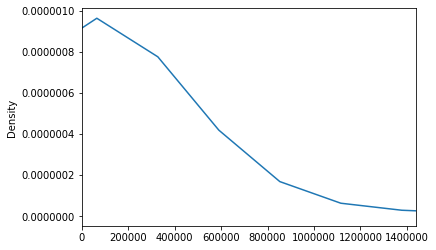

In [6]:
col = "Trade Volume"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.0, 426.6999999999971)

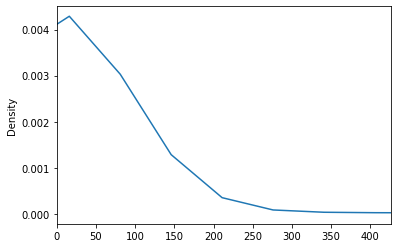

In [7]:
col = "Transaction"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.0, 32026677.02499994)

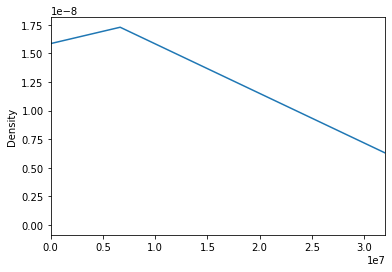

In [8]:
col = "Trade Value"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.19, 53.60000000000001)

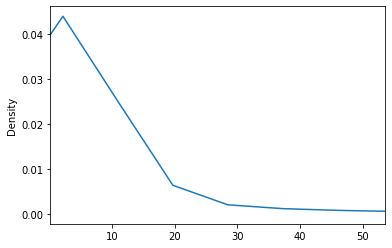

In [9]:
col = "Opening Price"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.19, 53.92749999999996)

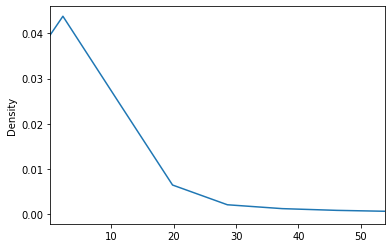

In [10]:
col = "Highest Price"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.18, 53.12749999999997)

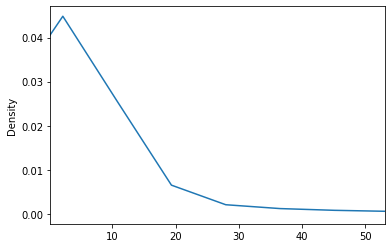

In [11]:
col = "Lowest Price"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.19, 53.8)

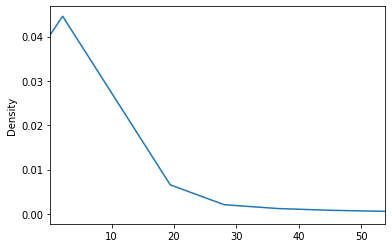

In [12]:
col = "Closing Price"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(-0.24, 0.31)

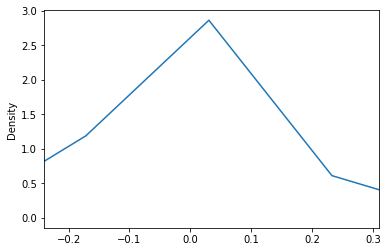

In [13]:
col = "Change"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.03, 36.6125)

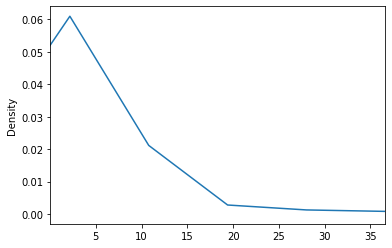

In [14]:
col = "Last Best Bid Price"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(1.0, 499.0)

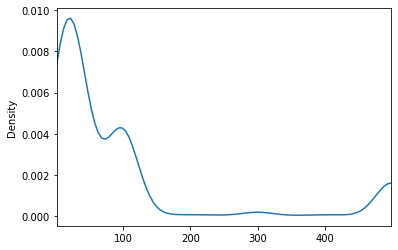

In [15]:
col = "Last Best Bid Volume"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.04, 37.159999999999854)

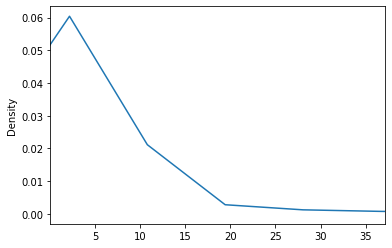

In [16]:
col = "Last Best Ask Price"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.0, 498.0)

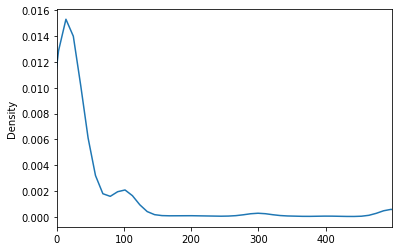

In [17]:
col = "Last Best Ask Volume"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

(0.0, 4305.0)

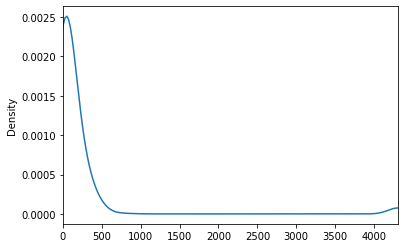

In [18]:
col = "Price-Earning ratio"
series = df[col]
ax = series.plot.kde()
ax.set_xlim(series.quantile(0.025), series.quantile(0.975))

'Security Code','Trade Volume','Transaction','Trade Value', 
'Opening Price','Highest Price','Lowest Price','Closing Price', 
'Change','Last Best Bid Price','Last Best Bid Volume', 
'Last Best Ask Price','Last Best Ask Volume','Price-Earning ratio'